## Load the Data

In [1]:
import pandas as pd

In [2]:
retail = pd.read_csv('https://raw.githubusercontent.com/insaid2018/INSAIDThursdays/master/Data/OnlineRetail.csv')

## Explore Data

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,560233,22610,PENS ASSORTED FUNNY FACE,36,11/16/2018 11:10,0.19,16813,United Kingdom
1,545085,22417,PACK OF 60 SPACEBOY CAKE CASES,1,6/30/2018 11:19,0.55,15039,United Kingdom
2,563567,23035,DRAWER KNOB CERAMIC IVORY,6,12/17/2018 14:44,1.45,13004,United Kingdom
3,537603,22419,LIPSTICK PEN RED,12,4/8/2018 12:49,0.42,14673,United Kingdom
4,570218,22470,HEART OF WICKER LARGE,12,2/8/2019 12:20,2.95,16873,United Kingdom


## Preprocess Data for RFM Analysis

In [4]:
from Clustering import Preprocessing

#### Change InvoiceDate from string datatype to date datetype for further analysis

In [5]:
preprocess = Preprocessing()

In [6]:
preprocess.fix_data(retail)

## RFM Analysis

In [7]:
from Clustering import RFMAnalysis

In [8]:
rfm_analysis = RFMAnalysis()

### Extract Day from InvoiceDate

In [9]:
rfm_analysis.extract_day(retail)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,560233,22610,PENS ASSORTED FUNNY FACE,36,2018-11-16 11:10:00,0.19,16813,United Kingdom,2018-11-16
1,545085,22417,PACK OF 60 SPACEBOY CAKE CASES,1,2018-06-30 11:19:00,0.55,15039,United Kingdom,2018-06-30
2,563567,23035,DRAWER KNOB CERAMIC IVORY,6,2018-12-17 14:44:00,1.45,13004,United Kingdom,2018-12-17
3,537603,22419,LIPSTICK PEN RED,12,2018-04-08 12:49:00,0.42,14673,United Kingdom,2018-04-08
4,570218,22470,HEART OF WICKER LARGE,12,2019-02-08 12:20:00,2.95,16873,United Kingdom,2019-02-08


### Print range of dates available in the Data

In [10]:
rfm_analysis.min_max_day(retail)

Min : 2018-04-02 00:00:00
Max : 2019-04-10 00:00:00


### Calculate RFM values for each customer

In [11]:
rfm = rfm_analysis.calculate_rfm(retail)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,63,1456.15
12348,75,12,836.36
12349,18,17,376.36
12350,310,8,142.50
12352,36,30,965.60


### Calculate RFM Score for each customer

In [12]:
rfm_analysis.rfm_score(rfm)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347,2,63,1456.15,4,4,4,444,12.0
12348,75,12,836.36,2,2,4,224,8.0
12349,18,17,376.36,4,3,3,433,10.0
12350,310,8,142.50,1,2,2,122,5.0
12352,36,30,965.60,3,3,4,334,10.0


### RFM_Segment: 111 indicates Low Value Customer

In [13]:
rfm_analysis.rfm_111(rfm)

            Recency  Frequency  Monetary
CustomerID                              
12353           204          1     17.70
12373           311          2     56.70
12401           303          3     40.95
12402           323          3     58.50
12414           217          2     72.70


### RFM_Segment: 444 indicates High Value Customer

In [14]:
rfm_analysis.rfm_444(rfm)

            Recency  Frequency  Monetary
CustomerID                              
12347             2         63   1456.15
12362             3         79   1668.49
12417             3         56   1065.97
12423             0         36    510.84
12433             0        143   4606.96


### Assign the following labels to each customer based on their RFM Score:
- Gold
- Silver
- Bronze
- Green

In [15]:
rfm_analysis.assign_labels(rfm)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12347,2,63,1456.15,4,4,4,444,12.0,Gold
12348,75,12,836.36,2,2,4,224,8.0,Silver
12349,18,17,376.36,4,3,3,433,10.0,Silver
12350,310,8,142.50,1,2,2,122,5.0,Green
12352,36,30,965.60,3,3,4,334,10.0,Silver


## Clustering customers using Machine Learning

### K Means Clustering

In [16]:
from Clustering import K_Means

In [17]:
k_means = K_Means()

### Preprocessing Data for performing K Means Clustering

In [18]:
processed_data = k_means.preprocesser(rfm)

### Find appropriate k value for clustering

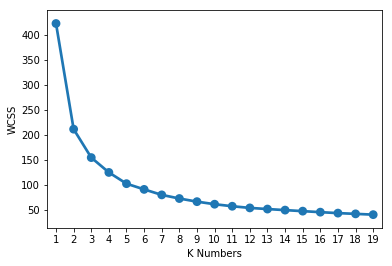

In [19]:
k_means.elbow_plot(processed_data)

#### From graph, optimal number of clusters is 6

## Form Clusters

In [20]:
k_means.make_clusters(processed_data,rfm)

### Examine which customer belongs to which cluster

In [21]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12347,2,63,1456.15,4,4,4,444,12.0,Gold,1
12348,75,12,836.36,2,2,4,224,8.0,Silver,5
12349,18,17,376.36,4,3,3,433,10.0,Silver,4
12350,310,8,142.50,1,2,2,122,5.0,Green,0
12352,36,30,965.60,3,3,4,334,10.0,Silver,5


### Visualizing Clusters

<IPython.core.display.Javascript object>


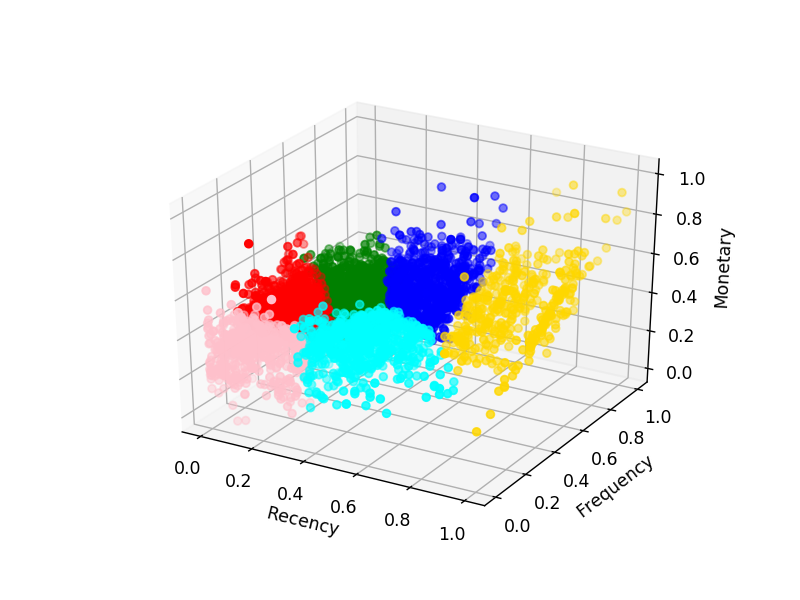

In [25]:
%matplotlib notebook
from Visualize import Visualize_Cluster
Visualize_Cluster.plot(rfm)